In [1]:
!pip install pandas scikit-learn imbalanced-learn opendatasets langdetect requests



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import opendatasets as od
import shutil

# Move kaggle.json to the expected location
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

# Dataset URLs
urls = [
    "https://www.kaggle.com/datasets/ankushbisht005/udemy-courses-data-2023",
    "https://www.kaggle.com/datasets/khusheekapoor/edx-courses-dataset-2021",
    "https://www.kaggle.com/datasets/santoshapatil31/edx-all-courses-3082-courses",
    "https://www.kaggle.com/datasets/everydaycodings/multi-platform-online-courses-dataset"
]

# Set output folder
output_dir = "../data/raw"
os.makedirs(output_dir, exist_ok=True)

# Download each dataset
for url in urls:
    od.download(url, data_dir=output_dir)

print("✅ Datasets downloaded to '../data/raw/'")


Dataset URL: https://www.kaggle.com/datasets/ankushbisht005/udemy-courses-data-2023


100%|██████████| 8.08M/8.08M [00:00<00:00, 902MB/s]


Dataset URL: https://www.kaggle.com/datasets/khusheekapoor/edx-courses-dataset-2021


100%|██████████| 364k/364k [00:00<00:00, 372MB/s]


Dataset URL: https://www.kaggle.com/datasets/santoshapatil31/edx-all-courses-3082-courses


100%|██████████| 270k/270k [00:00<00:00, 138MB/s]


Dataset URL: https://www.kaggle.com/datasets/everydaycodings/multi-platform-online-courses-dataset


100%|██████████| 2.81M/2.81M [00:00<00:00, 473MB/s]


✅ Datasets downloaded to '../data/raw/'


In [6]:
import pandas as pd
import os

RAW_DIR = "../data/raw"

def std(df, title_col, desc_col=None):
    df = df.rename(columns={title_col: "course_title"})
    df["skills"] = df.get(desc_col, "").fillna("") if desc_col else ""
    return df[["course_title", "skills"]].dropna().drop_duplicates()

# ✅ Corrected paths to match your directory structure
df_u = pd.read_csv(f"{RAW_DIR}/udemy-courses-data-2023/courses.csv")
df_e1 = pd.read_csv(f"{RAW_DIR}/edx-courses-dataset-2021/EdX.csv")
df_e2 = pd.read_csv(f"{RAW_DIR}/edx-all-courses-3082-courses/All_edx_courses_catalog.csv")
df_m_raw = pd.read_csv(f"{RAW_DIR}/multi-platform-online-courses-dataset/edx.csv")

# Detect column names for multi-platform dataset
tcol = "course_title" if "course_title" in df_m_raw.columns else df_m_raw.columns[0]
dcol = df_m_raw.columns[1] if len(df_m_raw.columns) > 1 else None

# Standardize all
df_u = std(df_u, "title")
df_e1 = std(df_e1, "Name", "Course Description")
df_e2 = std(df_e2, "course_name", "course_subtitle")
df_m = std(df_m_raw, tcol, dcol)

print("🔢 Dataset Sizes:")
print(f"Udemy: {len(df_u)} | EdX 2021: {len(df_e1)} | EdX 3082: {len(df_e2)} | Multi: {len(df_m)}")


🔢 Dataset Sizes:
Udemy: 82798 | EdX 2021: 719 | EdX 3082: 3065 | Multi: 784


In [23]:
def map_job_role(text):
    t = text.lower()

    # --- Data Analyst ---
    if any(x in t for x in [
        "excel", "power bi", "sql", "tableau", "analytics", "data visualization", "data analyst", 
        "business intelligence", "dashboards", "reporting", "descriptive statistics", "lookml", "mode", "metabase"
    ]): return "Data Analyst"

    # --- ML Engineer ---
    if any(x in t for x in [
        "machine learning", "deep learning", "tensorflow", "pytorch", "ml", "ai", "xgboost", 
        "lightgbm", "scikit-learn", "model deployment", "mlops", "huggingface", "transformers", "neural networks"
    ]): return "ML Engineer"

    # --- Data Scientist ---
    if any(x in t for x in [
        "data science", "eda", "regression", "clustering", "classification", "data wrangling",
        "feature engineering", "statistical modeling", "nlp", "k-means", "time series", "monte carlo", 
        "hypothesis testing", "bayesian", "data storytelling"
    ]): return "Data Scientist"

    # --- Data Engineer ---
    if any(x in t for x in [
        "data engineer", "etl", "airflow", "kafka", "spark", "hadoop", "big data", 
        "data pipeline", "databricks", "redshift", "dwh", "snowflake", "lakehouse", "data ingestion"
    ]): return "Data Engineer"

    # --- Backend Developer ---
    if any(x in t for x in [
        "backend", "flask", "django", "spring", "node", "express", "api", "rest api", 
        "grpc", "microservice", "server", "java", "php", "ruby on rails", "authentication", 
        "postgres", "mysql", "sqlalchemy", "orm", "typeorm", "backend logic"
    ]): return "Backend Developer"

    # --- Frontend Developer ---
    if any(x in t for x in [
        "frontend", "react", "html", "css", "javascript", "typescript", "vue", "angular", 
        "ui", "ux", "redux", "tailwind", "web development", "next.js", "svelte", 
        "dom manipulation", "client side", "component", "responsive"
    ]): return "Frontend Developer"

    # --- Full Stack Developer ---
    if any(x in t for x in [
        "full stack", "mern", "mean", "mevn", "frontend and backend", "react and node", 
        "end-to-end app", "web app development", "complete web developer"
    ]): return "Full Stack Developer"

    # --- Cloud Engineer ---
    if any(x in t for x in [
        "cloud", "aws", "azure", "gcp", "cloud computing", "cloud architect", 
        "lambda", "ec2", "s3", "cloudformation", "kubernetes", "terraform", 
        "cloud security", "cloud networking", "devops on cloud"
    ]): return "Cloud Engineer"

    # --- DevOps Engineer ---
    if any(x in t for x in [
        "devops", "cicd", "jenkins", "docker", "kubernetes", "terraform", "ansible", 
        "infrastructure as code", "monitoring", "grafana", "prometheus", "helm", "deployment automation"
    ]): return "DevOps Engineer"

    # --- Cybersecurity Analyst ---
    if any(x in t for x in [
        "cybersecurity", "ethical hacking", "penetration testing", "network security", 
        "information security", "cryptography", "security analyst", "malware", 
        "firewall", "threat detection", "vulnerability", "security audit"
    ]): return "Cybersecurity Analyst"

    # --- Mobile App Developer ---
    if any(x in t for x in [
        "android", "ios", "mobile app", "flutter", "kotlin", "swift", "react native", 
        "mobile development", "app store", "play store"
    ]): return "Mobile App Developer"

    # --- UI/UX Designer ---
    if any(x in t for x in [
        "ui design", "ux design", "figma", "adobe xd", "user experience", 
        "user interface", "prototyping", "wireframing", "design thinking", "usability testing"
    ]): return "UI/UX Designer"

    return None


In [21]:
for df, name in zip([df_u, df_e1, df_e2, df_m], ["Udemy", "EdX‑2021", "EdX‑3082", "Multi‑Platform"]):
    df["job_role"] = df["course_title"].apply(map_job_role)
    print(f"\n📊 {name} Role Counts:\n{df['job_role'].value_counts()}")

df_all = pd.concat([df_u, df_e1, df_e2, df_m], ignore_index=True)
df_all = df_all.dropna(subset=["job_role"])

print(f"\n✅ Final Combined Dataset Shape: {df_all.shape}")
print("\n📢 Overall Role Distribution:\n", df_all["job_role"].value_counts())

df_all.to_csv("../data/preprocessed/courses_all_labeled.csv", index=False)



📊 Udemy Role Counts:
job_role
Frontend Developer       8100
ML Engineer              7910
Data Analyst             5664
Backend Developer        4423
Cloud Engineer           1260
Mobile App Developer      719
Data Scientist            560
Cybersecurity Analyst     413
Data Engineer             353
DevOps Engineer           240
UI/UX Designer            132
Full Stack Developer       56
Name: count, dtype: int64

📊 EdX‑2021 Role Counts:
job_role
ML Engineer              70
Data Analyst             39
Backend Developer        19
Data Scientist           17
Frontend Developer       17
UI/UX Designer            6
Cybersecurity Analyst     6
Cloud Engineer            6
DevOps Engineer           3
Data Engineer             3
Mobile App Developer      2
Name: count, dtype: int64

📊 EdX‑3082 Role Counts:
job_role
ML Engineer              221
Data Analyst             160
Backend Developer        137
Frontend Developer        98
Mobile App Developer      36
Data Scientist            34
Data En

In [22]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

df_all = df_all[df_all['course_title'].apply(is_english)].reset_index(drop=True)
print("✅ English-only dataset shape:", df_all.shape)


✅ English-only dataset shape: (24904, 3)


In [24]:
from collections import defaultdict
import random

role_to_courses = defaultdict(list)
for _, row in df_all.iterrows():
    role_to_courses[row["job_role"]].append(row["course_title"])

users = []
n_users = 3000
job_roles = list(role_to_courses.keys())

for _ in range(n_users):
    role = random.choice(job_roles)
    role_courses = role_to_courses[role]

    n_courses = random.randint(3, 10)
    n_main = int(n_courses * random.uniform(0.8, 1.0))
    n_noise = n_courses - n_main

    main_courses = random.sample(role_courses, min(n_main, len(role_courses)))
    noise_courses = [random.choice(role_to_courses[random.choice([r for r in job_roles if r != role])]) for _ in range(n_noise)]

    search_history = main_courses + noise_courses
    random.shuffle(search_history)

    users.append({"search_history": " | ".join(search_history), "job_role": role})

df_users = pd.DataFrame(users)
print("👤 Users DataFrame Shape:", df_users.shape)

df_users.to_csv("../data/preprocessed/users_labeled.csv", index=False)


👤 Users DataFrame Shape: (3000, 2)


In [27]:
users=pd.read_csv("../data/preprocessed/users_labeled.csv")
users['search_history'][0]

'DevOps For Beginners: Saving Your Code From The Apocalypse | Learn DevOps from the Scratch for Absolute Beginners | PRTG Network Monitoring Course with LAB | Data Engineering for Beginner using Google Cloud & Python | DevOps Project: CICD with Git GitLab Jenkins  and Laravel | ELASTIC 8: Monitoring with Elasticsearch, Kibana, Beats, APM | Introduction to Jenkins… | Jenkins Unlocked: 4-In-One'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import joblib

vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X = vectorizer.fit_transform(df_users["search_history"])
y = df_users["job_role"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_sm, y_train_sm = SMOTE(random_state=42).fit_resample(X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "SVC": SVC(probability=True)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    trained_models[name] = model
    print(f"✅ Trained {name}")

joblib.dump(vectorizer, "../models/vectorizer.pkl")
for name, model in trained_models.items():
    joblib.dump(model, f"../models/{name.replace(' ', '_').lower()}.pkl")


✅ Trained Logistic Regression
✅ Trained Random Forest
✅ Trained Naive Bayes
✅ Trained SVC


In [29]:
from sklearn.metrics import accuracy_score, classification_report

print("📊 Evaluation on Test Set (Individual Models)")
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    print(f"\n🔍 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


📊 Evaluation on Test Set (Individual Models)

🔍 Logistic Regression
Accuracy: 0.9683333333333334
                       precision    recall  f1-score   support

    Backend Developer       0.98      0.93      0.95        45
       Cloud Engineer       0.96      0.98      0.97        46
Cybersecurity Analyst       1.00      0.96      0.98        49
         Data Analyst       0.96      1.00      0.98        52
        Data Engineer       1.00      0.98      0.99        51
       Data Scientist       0.98      1.00      0.99        54
      DevOps Engineer       0.94      0.98      0.96        48
   Frontend Developer       0.96      0.96      0.96        53
 Full Stack Developer       0.98      0.98      0.98        48
          ML Engineer       0.94      0.88      0.91        56
 Mobile App Developer       0.96      0.98      0.97        46
       UI/UX Designer       0.96      1.00      0.98        52

             accuracy                           0.97       600
            macro a

In [30]:
from sklearn.ensemble import StackingClassifier

stacked_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('nb', MultinomialNB()),
        ('svc', SVC(probability=True))
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

stacked_model.fit(X_train, y_train)
joblib.dump(stacked_model, "../models/stacked_model.pkl")
print("✅ Trained and saved stacked model")


✅ Trained and saved stacked model


In [31]:
y_pred_stack = stacked_model.predict(X_test)

print("\n🤖 Stacked Ensemble Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))



🤖 Stacked Ensemble Model Evaluation
Accuracy: 0.97
Classification Report:
                        precision    recall  f1-score   support

    Backend Developer       1.00      0.89      0.94        45
       Cloud Engineer       0.98      0.98      0.98        46
Cybersecurity Analyst       1.00      0.96      0.98        49
         Data Analyst       0.95      1.00      0.97        52
        Data Engineer       1.00      1.00      1.00        51
       Data Scientist       0.98      1.00      0.99        54
      DevOps Engineer       0.96      0.98      0.97        48
   Frontend Developer       0.94      0.96      0.95        53
 Full Stack Developer       0.98      0.98      0.98        48
          ML Engineer       0.93      0.91      0.92        56
 Mobile App Developer       0.98      0.98      0.98        46
       UI/UX Designer       0.96      1.00      0.98        52

             accuracy                           0.97       600
            macro avg       0.97      0.

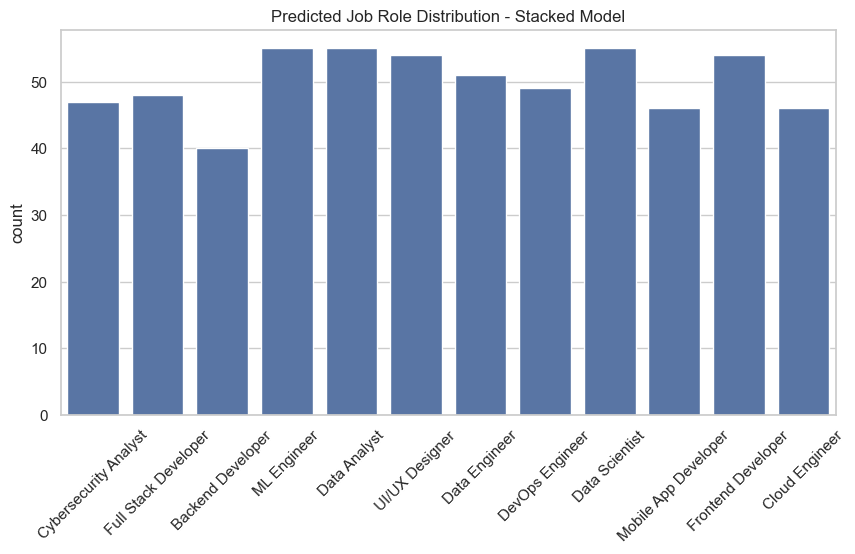

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x=y_pred_stack)
plt.title("Predicted Job Role Distribution - Stacked Model")
plt.xticks(rotation=45)
plt.show()


In [33]:
import numpy as np

sample_users = [
    {"search_history": "Power BI Dashboards | SQL for Data Analysts | Excel Automation | Tableau for Business Intelligence"},
    {"search_history": "Frontend with React | Advanced CSS Animations | JavaScript | Node.js | Git"},
    {"search_history": "AWS IAM & S3 | Azure | DevOps CI/CD | Java | Cybersecurity"},
    {"search_history": "Kali Linux Penetration Testing | Network Security | Ethical Hacking | React UI"},
    {"search_history": "Deep Learning with PyTorch | Neural Networks | AI for Robotics | Machine Learning"}
]

df_samples = pd.DataFrame(sample_users)
X_sample = vectorizer.transform(df_samples["search_history"])
y_pred = stacked_model.predict(X_sample)
proba = stacked_model.predict_proba(X_sample)
classes = stacked_model.classes_

for i, row in enumerate(df_samples.itertuples()):
    top_indices = proba[i].argsort()[::-1][:2]
    top_roles = [classes[idx] for idx in top_indices]
    print(f"\n🧾 Search History:\n{row.search_history}")
    print(f"🎯 Predicted Role: {top_roles[0]}")
    print(f"💡 You might also be interested in: {top_roles[1]}")



🧾 Search History:
Power BI Dashboards | SQL for Data Analysts | Excel Automation | Tableau for Business Intelligence
🎯 Predicted Role: Data Analyst
💡 You might also be interested in: ML Engineer

🧾 Search History:
Frontend with React | Advanced CSS Animations | JavaScript | Node.js | Git
🎯 Predicted Role: Backend Developer
💡 You might also be interested in: ML Engineer

🧾 Search History:
AWS IAM & S3 | Azure | DevOps CI/CD | Java | Cybersecurity
🎯 Predicted Role: Cloud Engineer
💡 You might also be interested in: Backend Developer

🧾 Search History:
Kali Linux Penetration Testing | Network Security | Ethical Hacking | React UI
🎯 Predicted Role: Cybersecurity Analyst
💡 You might also be interested in: ML Engineer

🧾 Search History:
Deep Learning with PyTorch | Neural Networks | AI for Robotics | Machine Learning
🎯 Predicted Role: ML Engineer
💡 You might also be interested in: Backend Developer


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_courses(search_text, role, n=5):
    df_role = df_all[df_all["job_role"] == role].drop_duplicates(subset=["course_title"])
    course_vecs = vectorizer.transform(df_role["course_title"])
    user_vec = vectorizer.transform([search_text])
    similarities = cosine_similarity(user_vec, course_vecs).flatten()
    top_idx = similarities.argsort()[::-1][:n]
    return df_role.iloc[top_idx]["course_title"].tolist()

for i, row in enumerate(df_samples.itertuples()):
    courses = recommend_similar_courses(row.search_history, y_pred[i])
    print(f"\n🧾 Search History:\n{row.search_history}")
    print(f"🎯 Role: {y_pred[i]}")
    print("📚 Recommended Courses:")
    for c in courses: print(" -", c)



🧾 Search History:
Power BI Dashboards | SQL for Data Analysts | Excel Automation | Tableau for Business Intelligence
🎯 Role: Data Analyst
📚 Recommended Courses:
 - Business Intelligence con Excel e Power BI
 - Business Intelligence Analyst - Power BI ,Tableau
 - Data Analyst | Business Intelligence: Python,BI,Tableau,SQL
 - Data Analysis & Business Intelligence: SQL  MySQL Power BI
 - Business Intelligence and Automated Reports using Power BI

🧾 Search History:
Frontend with React | Advanced CSS Animations | JavaScript | Node.js | Git
🎯 Role: Backend Developer
📚 Recommended Courses:
 - Complete Next.js with React & Node - Beautiful Portfolio App
 - Stripe Masterclass With React.js & Node.js
 - Full Stack Development with React and Node Js
 - Full Stack Isomorphic JavaScript with Vue.js & Node.js
 - Fullstack JavaScript : Learn JavaScript,React ,Node,Mongo DB

🧾 Search History:
AWS IAM & S3 | Azure | DevOps CI/CD | Java | Cybersecurity
🎯 Role: Cloud Engineer
📚 Recommended Courses:
 - A

In [37]:
import requests

token = input("🔑 Enter your GitHub token (press Enter to skip): ").strip()
headers = {"Accept": "application/vnd.github+json"}
if token:
    headers["Authorization"] = f"Bearer {token}"
    print("✅ Authenticated")
else:
    print("⚠️ No token — limited to 60 requests/hour")

def search_github_repos(query, per_page=5):
    url = "https://api.github.com/search/repositories"
    params = {"q": query, "sort": "stars", "order": "desc", "per_page": per_page}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        print(f"❌ Error: {response.status_code}")
        return []
    return response.json()["items"]

query = f"{y_pred[0]} in:name,description"
repos = search_github_repos(query)

print(f"\n📦 Top GitHub Repos for '{y_pred[0]}':")
for r in repos:
    print(f"🔹 {r['full_name']} | ⭐ {r['stargazers_count']}")
    print(f"📄 {r['description']}")
    print(f"🔗 {r['html_url']}\n")


⚠️ No token — limited to 60 requests/hour

📦 Top GitHub Repos for 'Data Analyst':
🔹 dbt-labs/dbt-core | ⭐ 11081
📄 dbt enables data analysts and engineers to transform their data using the same practices that software engineers use to build applications.
🔗 https://github.com/dbt-labs/dbt-core

🔹 GoogleCloudPlatform/training-data-analyst | ⭐ 8212
📄 Labs and demos for courses for GCP Training (http://cloud.google.com/training).
🔗 https://github.com/GoogleCloudPlatform/training-data-analyst

🔹 amundsen-io/amundsen | ⭐ 4614
📄 Amundsen is a metadata driven application for improving the productivity of data analysts, data scientists and engineers when interacting with data.
🔗 https://github.com/amundsen-io/amundsen

🔹 girls-in-ai/Girls-In-AI | ⭐ 3211
📄 免费学代码系列：小白python入门、数据分析data analyst、机器学习machine learning、深度学习deep learning、kaggle实战
🔗 https://github.com/girls-in-ai/Girls-In-AI

🔹 weijie-chen/Linear-Algebra-With-Python | ⭐ 2444
📄 Lecture Notes for Linear Algebra Featuring Python. This series

In [1]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [39]:
import requests

# 🔑 GitHub token input
token = input("🔑 Enter your GitHub token (press Enter to skip): ").strip()
headers = {"Accept": "application/vnd.github+json"}
if token:
    headers["Authorization"] = f"Bearer {token}"
    print("✅ Authenticated")
else:
    print("⚠️ No token — limited to 60 requests/hour")

# 🧠 Simulated model output
y_pred = ["Data Analyst"]  # 🔁 Change as needed

# 🎯 Queries for each role
role_queries = {
    "Backend Developer": "rest-api OR springboot OR nodejs OR fastapi language:JavaScript",
    "Cloud Engineer": "aws OR gcp OR azure OR cloud-computing OR terraform language:Python",
    "Cybersecurity Analyst": "ethical-hacking OR pentest OR kali-linux OR cyber-security language:Python",
    "Data Analyst": "powerbi OR tableau OR pandas OR 'data analysis' language:Python",
    "Data Engineer": "data-pipeline OR airflow OR bigquery OR spark OR etl language:Python",
    "Data Scientist": "scikit-learn OR pandas OR 'data science' OR seaborn OR xgboost language:Python",
    "DevOps Engineer": "devops OR docker OR kubernetes OR ci/cd OR jenkins language:Python",
    "Frontend Developer": "reactjs OR nextjs OR html5 OR tailwindcss language:JavaScript",
    "Full Stack Developer": "mern OR react OR node OR express OR mongodb language:JavaScript",
    "ML Engineer": "pytorch OR keras OR sklearn OR huggingface OR 'machine learning' language:Python",
    "Mobile App Developer": "flutter OR react-native OR kotlin OR android OR swift language:Dart",
    "UI/UX Designer": "figma OR design-system OR ui-kit OR frontend-design language:JavaScript"
}

# 🔁 Optional fallback queries
fallback_queries = {
    "Data Engineer": "spark OR kafka OR etl OR databricks OR airflow language:Python",
    "UI/UX Designer": "web-design OR figma OR ux OR ui language:JavaScript",
    "Mobile App Developer": "react-native OR ios-app OR android-dev OR expo language:Dart",
    "ML Engineer": "transformers OR torch OR deep-learning OR fine-tuning language:Python"
}

# 🔍 Get main query
role = y_pred[0]
query = role_queries.get(role, f"{role} language:Python")

def search_github_repos(query, per_page=5):
    url = "https://api.github.com/search/repositories"
    params = {"q": query, "sort": "stars", "order": "desc", "per_page": per_page}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        print(f"❌ Error {response.status_code}: {response.text}")
        return []
    return response.json().get("items", [])

def clean(desc):
    if not desc:
        return "No description."
    return desc.replace('\n', ' ')[:200] + ("..." if len(desc) > 200 else "")

# 🔎 Try main query
repos = search_github_repos(query)

# 🧭 Use fallback if nothing relevant
if not repos or sum("demo" in (r.get("description") or "").lower() for r in repos) > 3:
    print("🔁 Using fallback query for better relevance...")
    fallback = fallback_queries.get(role)
    if fallback:
        repos = search_github_repos(fallback)

# 📦 Display results
print(f"\n📦 Top GitHub Repos for '{role}':")
if not repos:
    print("⚠️ No repositories found.")
else:
    for r in repos:
        print(f"🔹 {r['full_name']} | ⭐ {r['stargazers_count']}")
        print(f"📄 {clean(r['description'])}")
        print(f"🔗 {r['html_url']}\n")


⚠️ No token — limited to 60 requests/hour

📦 Top GitHub Repos for 'Data Analyst':
🔹 fighting41love/funNLP | ⭐ 74748
📄 中英文敏感词、语言检测、中外手机/电话归属地/运营商查询、名字推断性别、手机号抽取、身份证抽取、邮箱抽取、中日文人名库、中文缩写库、拆字词典、词汇情感值、停用词、反动词表、暴恐词表、繁简体转换、英文模拟中文发音、汪峰歌词生成器、职业名称词库、同义词库、反义词库、否定词库、汽车品牌词库、汽车零件词库、连续英文切割、各种中文词向量、公司名字大全、古诗词库、IT词库、财经词库、成语词库、地名词库、历史名...
🔗 https://github.com/fighting41love/funNLP

🔹 pandas-dev/pandas | ⭐ 45960
📄 Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more
🔗 https://github.com/pandas-dev/pandas

🔹 deepinsight/insightface | ⭐ 25843
📄 State-of-the-art 2D and 3D Face Analysis Project
🔗 https://github.com/deepinsight/insightface

🔹 sinaptik-ai/pandas-ai | ⭐ 20897
📄 Chat with your database or your datalake (SQL, CSV, parquet). PandasAI makes data analysis conversational using LLMs and RAG.
🔗 https://github.com/sinaptik-ai/pandas-ai

🔹 serengil/deepface | ⭐ 19670
📄 A Lightweight Fa